In [11]:
# Import packages
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Import MlFinLab tools
from mlfinlab.labeling import excess_over_mean

In [3]:
# Load price data for 20 stocks
tickers = "AAPL GOOG MSFT COST PFE SYY F GE BABA AMD CCL ZM FB WFC JPM AAL UBER C UA VZ"

data = yf.download(tickers, start="2019-01-20", end="2020-05-25",
                   group_by="ticker")
data = data.loc[:, (slice(None), 'Adj Close')]
data.columns = data.columns.droplevel(1)
data.head()

[*********************100%***********************]  20 of 20 completed


,MSFT,UA,JPM,CCL,COST,F,AAL,C,GE,FB,AMD,SYY,UBER,GOOG,VZ,PFE,ZM,BABA,AAPL,WFC
Date,,,,,,,,,,,,,,,,,,,,
2019-01-22,102.378891,18.590000,94.728691,51.750244,201.700165,7.837517,32.219025,56.094563,65.863930,147.570007,19.760000,58.341278,NaN,1070.520020,50.636242,35.752155,NaN,152.149994,37.205051,45.463188
2019-01-23,103.376701,18.400000,94.489426,51.512947,201.405807,7.689988,31.146366,56.348503,66.396347,144.300003,19.799999,58.555424,NaN,1075.569946,51.320393,35.659126,NaN,152.029999,37.355511,45.700260
2019-01-24,102.882629,18.860001,94.544640,52.224842,199.715439,7.929724,33.124378,56.874535,66.776604,145.830002,20.850000,58.220234,NaN,1073.900024,50.707317,34.635700,NaN,155.860001,37.059422,45.572598
2019-01-25,103.822334,19.490000,95.142784,52.689949,198.537949,8.169458,34.423374,58.062630,69.666702,149.009995,21.930000,57.745396,NaN,1090.989990,50.112022,34.373497,NaN,159.210007,38.287464,45.709377
2019-01-28,101.797615,19.370001,95.593712,53.534740,200.152313,7.985046,35.988075,57.908451,67.917435,147.470001,20.180000,57.978153,NaN,1070.079956,48.930298,33.434650,NaN,158.919998,37.933125,45.426708


In [4]:
excess1 = excess_over_mean(data, lag=True)
excess1.head()

,MSFT,UA,JPM,CCL,COST,F,AAL,C,GE,FB,AMD,SYY,UBER,GOOG,VZ,PFE,ZM,BABA,AAPL,WFC
Date,,,,,,,,,,,,,,,,,,,,
2019-01-22,0.012019,-0.007947,-0.000253,-0.002312,0.000814,-0.016550,-0.031019,0.006800,0.010357,-0.019886,0.004297,0.005944,NaN,0.006991,0.015784,-0.000329,NaN,0.001485,0.006317,0.007488
2019-01-23,-0.014010,0.015769,-0.008647,0.004589,-0.017624,0.021944,0.054276,0.000104,-0.003504,0.001372,0.043799,-0.014955,NaN,-0.010784,-0.021177,-0.037931,NaN,0.015961,-0.017157,-0.012025
2019-01-24,-0.007821,0.016450,-0.010628,-0.008048,-0.022850,0.013278,0.022261,0.003935,0.026326,0.004852,0.034844,-0.025110,NaN,-0.001040,-0.028694,-0.024525,NaN,0.004539,0.016183,-0.013953
2019-01-25,-0.009776,0.003569,0.014465,0.025759,0.017857,-0.012848,0.055180,0.007070,-0.015383,-0.000609,-0.070074,0.013756,NaN,-0.009440,-0.013856,-0.017587,NaN,0.007904,0.000471,0.003542
2019-01-28,-0.011539,-0.013889,0.011618,0.006344,0.006644,0.020374,0.001170,-0.001197,0.005467,-0.013415,-0.037258,0.005294,NaN,-0.000014,-0.023677,0.040195,NaN,-0.004010,-0.001538,0.009429


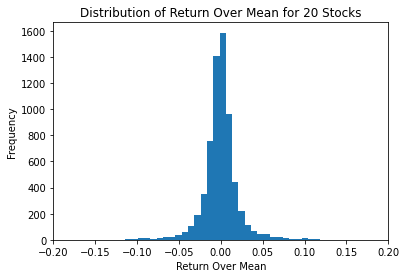

In [5]:
s1 = pd.Series(excess1.iloc[:-1, :].values.flatten())
ax1 = s1.plot.hist(bins=80)
ax1.set_xlim(-0.2,0.2)
ax1.set_xlabel('Return Over Mean')
ax1.set_title('Distribution of Return Over Mean for 20 Stocks'); 

In [6]:
excess2 = excess_over_mean(data, binary=True)
excess2.stack().value_counts()

-1.0    3347
 1.0    3256
dtype: int64

In [7]:
# Resample by week
excess3 = excess_over_mean(data, resample_by='W', lag=True)
excess3.head()

,MSFT,UA,JPM,CCL,COST,F,AAL,C,GE,FB,AMD,SYY,UBER,GOOG,VZ,PFE,ZM,BABA,AAPL,WFC
Date,,,,,,,,,,,,,,,,,,,,
2019-01-27,-0.070066,-0.061427,-0.024364,0.010529,-0.023364,-0.027758,0.003201,-0.027578,0.083342,0.082970,0.088544,-0.004111,NaN,-0.010991,-0.061905,0.035230,NaN,0.025919,0.026424,-0.044595
2019-02-03,0.037369,0.018795,-0.015008,-0.009464,-0.000065,-0.028594,0.008922,-0.016821,-0.028041,0.019027,-0.050317,0.050622,NaN,-0.004875,-0.001749,-0.005908,NaN,0.005619,0.037000,-0.016511
2019-02-10,0.009533,-0.014599,0.026739,-0.003651,0.027374,0.003279,-0.040988,0.021847,0.013943,-0.043464,0.012733,0.005643,NaN,0.002377,0.007829,-0.010574,NaN,-0.021829,-0.014541,0.018349
2019-02-17,0.014754,0.017527,-0.020247,0.021192,-0.015867,0.004870,-0.002483,-0.017059,-0.007108,-0.018790,0.013680,-0.018145,NaN,-0.017981,0.016871,-0.001828,NaN,0.049785,-0.000073,-0.019099
2019-02-24,0.004469,0.028560,-0.015017,-0.026249,0.004975,-0.000403,-0.033539,-0.004443,0.040638,-0.007179,-0.037503,-0.005875,NaN,0.017988,-0.008886,-0.000277,NaN,0.029752,0.001974,0.011015


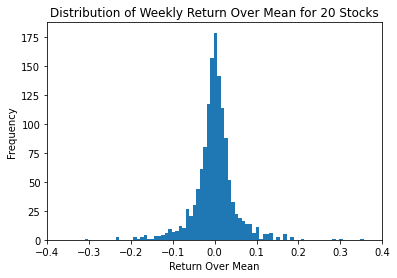

In [8]:
s3 = pd.Series(excess3.iloc[:-1, :].values.flatten())
ax3 = s3.plot.hist(bins=80)
ax3.set_xlim(-0.4,0.4)
ax3.set_xlabel('Return Over Mean')
ax3.set_title('Distribution of Weekly Return Over Mean for 20 Stocks');

In [9]:
excess4 = excess_over_mean(data, binary=True,resample_by='W', lag=True)
excess4.stack().value_counts()

 1.0    684
-1.0    669
dtype: int64